In [1]:
# Install PyCaret from GitHub master branch
!pip install git+https://github.com/pycaret/pycaret.git@master --upgrade -q


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [3]:
# Load Mall Customer Segmentation dataset
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Load dataset from URL
url = 'https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv'
df = pd.read_csv(url)

# Check columns first
print(f"Columns in dataset: {df.columns.tolist()}")

# Drop CustomerID if it exists
if 'CustomerID' in df.columns:
    df = df.drop(columns=['CustomerID'])

# Keep only numeric columns for clustering
df = df.select_dtypes(include=['number'])

print(f"\n✅ Mall Customers Dataset loaded: {df.shape}")
print(f"Features for clustering: {list(df.columns)}")
print(f"\nDataset Preview:")
df.head()

Columns in dataset: ['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

✅ Mall Customers Dataset loaded: (200, 3)
Features for clustering: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

Dataset Preview:


,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [4]:
# Explore the data before clustering
print("📊 Dataset Statistics:")
print(df.describe())

print(f"\n💡 We have {len(df)} customers with 3 features:")
print("   • Age: Customer age")
print("   • Annual Income (k$): Yearly income in thousands")
print("   • Spending Score (1-100): Shopping behavior score")

📊 Dataset Statistics:
              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000

💡 We have 200 customers with 3 features:
   • Age: Customer age
   • Annual Income (k$): Yearly income in thousands
   • Spending Score (1-100): Shopping behavior score


In [5]:
from pycaret.clustering import *

# Initialize clustering environment
clust_exp = setup(
    data=df,
    session_id=789,
    normalize=True,
    transformation=True,
    pca=True,
    pca_components=2,
    verbose=False
)

In [6]:
# Display all available clustering algorithms
print("🔍 Available Clustering Models:")
models()

🔍 Available Clustering Models:


,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


In [7]:
# Create K-Means clustering model with 5 clusters
print("🤖 Creating K-Means model with 5 customer segments...")
kmeans_model = create_model('kmeans', num_clusters=5)
print("✅ K-Means model created!")

🤖 Creating K-Means model with 5 customer segments...


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3921,181.1276,0.8359,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

✅ K-Means model created!


In [8]:
# Check if GPU is available
!nvidia-smi --query-gpu=name --format=csv,noheader

Tesla T4


In [9]:
# Assign cluster labels to customers
clustered_data = assign_model(kmeans_model)

print(f"✅ Customers segmented into {len(clustered_data['Cluster'].unique())} clusters")
print(f"\nCluster Distribution:")
print(clustered_data['Cluster'].value_counts().sort_index())

print("\n📊 Sample of clustered customers:")
clustered_data.head(10)

✅ Customers segmented into 5 clusters

Cluster Distribution:
Cluster
Cluster 0    41
Cluster 1    43
Cluster 2    28
Cluster 3    47
Cluster 4    41
Name: count, dtype: int64

📊 Sample of clustered customers:


,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,Cluster 2
1,21,15,81,Cluster 2
2,20,16,6,Cluster 0
3,23,16,77,Cluster 2
4,31,17,40,Cluster 2
5,22,17,76,Cluster 2
6,35,18,6,Cluster 0
7,23,18,94,Cluster 2
8,64,19,3,Cluster 0
9,30,19,72,Cluster 2


📈 Generating cluster visualizations...


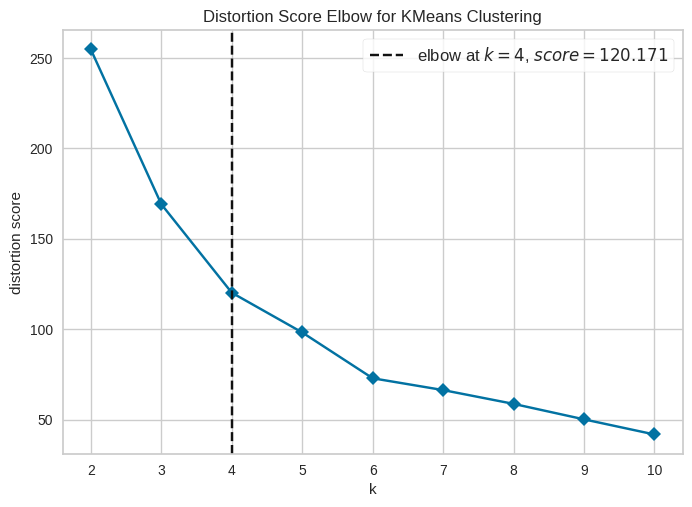

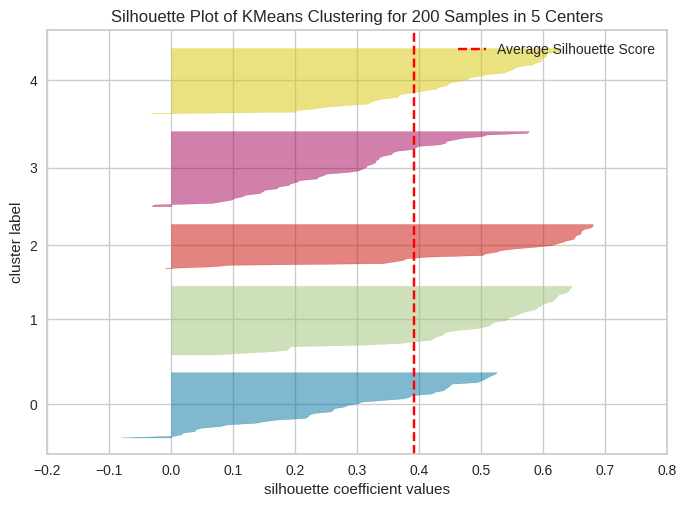

In [10]:
# Generate clustering visualizations
print("📈 Generating cluster visualizations...")

plot_model(kmeans_model, plot='elbow')
plot_model(kmeans_model, plot='silhouette')
plot_model(kmeans_model, plot='cluster')
plot_model(kmeans_model, plot='distribution')

In [11]:
# Analyze each cluster's characteristics
print("🔍 Cluster Characteristics:")
cluster_summary = clustered_data.groupby('Cluster').mean()
print(cluster_summary)

print("\n💡 Cluster Insights:")
for cluster in sorted(clustered_data['Cluster'].unique()):
    cluster_data = clustered_data[clustered_data['Cluster'] == cluster]
    avg_age = cluster_data['Age'].mean()
    avg_income = cluster_data['Annual Income (k$)'].mean()
    avg_spending = cluster_data['Spending Score (1-100)'].mean()
    print(f"\n   Cluster {cluster}: {len(cluster_data)} customers")
    print(f"      Avg Age: {avg_age:.1f} years")
    print(f"      Avg Income: ${avg_income:.1f}k")
    print(f"      Avg Spending Score: {avg_spending:.1f}/100")

🔍 Cluster Characteristics:
                 Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                         
Cluster 0  52.560976           37.097561               33.829268
Cluster 1  31.395349           84.465116               79.093023
Cluster 2  24.392857           28.357143               73.392857
Cluster 3  33.829787           58.574468               45.595745
Cluster 4  48.585366           83.219512               25.707317

💡 Cluster Insights:

   Cluster Cluster 0: 41 customers
      Avg Age: 52.6 years
      Avg Income: $37.1k
      Avg Spending Score: 33.8/100

   Cluster Cluster 1: 43 customers
      Avg Age: 31.4 years
      Avg Income: $84.5k
      Avg Spending Score: 79.1/100

   Cluster Cluster 2: 28 customers
      Avg Age: 24.4 years
      Avg Income: $28.4k
      Avg Spending Score: 73.4/100

   Cluster Cluster 3: 47 customers
      Avg Age: 33.8 years
      Avg Income: $58.6k
      Avg Spending Score: 45.6/100

   Clust

In [12]:
# Interactive dashboard for cluster evaluation
evaluate_model(kmeans_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [13]:
# Try another clustering algorithm - DBSCAN
print("🧩 Creating DBSCAN model...")
dbscan_model = create_model('dbscan')

dbscan_clustered = assign_model(dbscan_model)
print(f"\nDBSCAN found {len(dbscan_clustered['Cluster'].unique())} clusters")
plot_model(dbscan_model, plot='cluster')

🧩 Creating DBSCAN model...


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2579,0.2880,13.3845,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


DBSCAN found 2 clusters


In [14]:
# Save the K-Means model
model_name = 'customer_segmentation_kmeans'
save_model(kmeans_model, model_name)

print(f"✅ Model successfully saved as '{model_name}.pkl'")
print(f"📦 Model can be loaded using: loaded = load_model('{model_name}')")

print(f"\n🎯 Clustering Summary:")
print(f"   • Dataset: Mall Customers (200 samples)")
print(f"   • Algorithm: K-Means")
print(f"   • Number of Clusters: 5")
print(f"   • Use Case: Customer segmentation for marketing")

Transformation Pipeline and Model Successfully Saved
✅ Model successfully saved as 'customer_segmentation_kmeans.pkl'
📦 Model can be loaded using: loaded = load_model('customer_segmentation_kmeans')

🎯 Clustering Summary:
   • Dataset: Mall Customers (200 samples)
   • Algorithm: K-Means
   • Number of Clusters: 5
   • Use Case: Customer segmentation for marketing
